## Importing entire text files
In this exercise, you'll be working with the file moby_dick.txt. It is a text file that contains the opening sentences of Moby Dick, one of the great American novels! Here you'll get experience opening a text file, printing its contents to the shell and, finally, closing it.

In [1]:
fileloc = '../_datasets/'
filename =  'moby_dick.txt'

In [2]:
# Open the file moby_dick.txt as read-only
file = open(fileloc+filename, mode='r')

#read the file
print(file.read())

CHAPTER 1. Loomings.

Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in this. If th

In [3]:
# Check whether file is closed
print(file.closed)

# Close file
file.close()

# Check whether file is closed
print(file.closed)

False
True


## Using <a href="https://docs.python.org/3/library/contextlib.html">Context Managers</a>
Context Managers is a <a href="https://docs.python.org/3/glossary.html#term-decorator">decorator</a> that can be used to define a factory function for <a href="https://docs.python.org/3/reference/compound_stmts.html#with">with</a> statement context managers, without needing to create a class or separate <a href="https://docs.python.org/3/reference/datamodel.html#object.__enter__">__enter__()</a> and <a href="https://docs.python.org/3/reference/datamodel.html#object.__exit__">__exit__()</a> methods.

<a href="http://book.pythontips.com/en/latest/context_managers.html">Context Managers</a> allow you to allocate and release resources precisely when you want to. The most widely used example of context managers is the with statement. Suppose you have two related operations which you’d like to execute as a pair, with a block of code in between. Context managers allow you to do specifically that.

Perhaps the most common (and important) use of context managers is to properly <a href="https://jeffknupp.com/blog/2016/03/07/python-with-context-managers/">manage resources</a>. In fact, that's the reason we use a context manager when reading from a file. The act of opening a file consumes a resource (called a file descriptor), and this resource is limited by your OS. That is to say, there are a maximum number of files a process can have open at one time.

In [4]:
# Read & print the first 3 lines
with open(fileloc+filename) as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

CHAPTER 1. Loomings.



Call me Ishmael. Some years ago--never mind how long precisely--having



## Why we like flat files and the Zen of Python
In PythonLand, there are currently hundreds of Python Enhancement Proposals, commonly referred to as PEPs. <a href="https://www.python.org/dev/peps/pep-0008/">PEP8</a>, for example, is a standard style guide for Python, written by our sensei Guido van Rossum himself. It is the basis for how we here at DataCamp ask our instructors to <a href="https://instructor-support.datacamp.com/#tab_style_guide_python">style their code</a>. Another one of my favorites is <a href="https://www.python.org/dev/peps/pep-0020/">PEP20</a>, commonly called the Zen of Python. Its abstract is as follows:

__*Long time Pythoneer Tim Peters succinctly channels the <a href="https://docs.python.org/3.3/glossary.html#term-bdfl">BDFL</a>'s guiding principles for Python's design into 20 aphorisms, only 19 of which have been written down*__.

In [5]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## Using NumPy to import flat files
In this exercise, you're now going to load the MNIST (database of handwritten digits) digit recognition dataset using the numpy function loadtxt() and see just how easy it can be:

* The first argument will be the filename.
* The second will be the delimiter which, in this case, is a comma.

You can find more information about the MNIST dataset <a href="http://yann.lecun.com/exdb/mnist/">here</a> on the webpage of Yann LeCun, who is currently Director of AI Research at Facebook and Founding Director of the NYU Center for Data Science, among many other things.

In [10]:
# Import package
import numpy as np
import matplotlib.pyplot as plt

# Assign filename to variable: file
file = 'digits.csv'

# Load file as array: digits
digits = np.loadtxt(fileloc+file, delimiter=',')

# Print datatype of digits
print(type(digits))

digits

<class 'numpy.ndarray'>


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [2., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]])

In [29]:
# Select and reshape a row 
im = digits[21, 1:]
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html
im_sq = np.reshape(im, (28, 28))

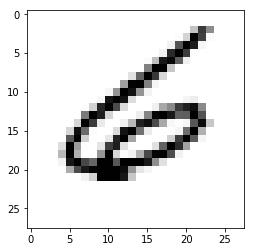

In [33]:
# Plot reshaped data
# https://matplotlib.org/users/image_tutorial.html 
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()

## Customizing your NumPy import
What if there are rows, such as a header, that you don't want to import? What if your file has a delimiter other than a comma? What if you only wish to import particular columns?

There are a number of arguments that np.loadtxt() takes that you'll find useful: delimiter changes the delimiter that loadtxt() is expecting, for example, you can use ',' and '\t' for comma-delimited and tab-delimited respectively; skiprows allows you to specify how many rows (not indices) you wish to skip; usecols takes a list of the indices of the columns you wish to keep.

The file that you'll be importing, digits_header.txt,

* has a header
* is tab-delimited.

In [47]:
# Import numpy
import numpy as np

# Assign the filename: file
file = fileloc+'digits_header.txt'

# Load the data: data
data = np.loadtxt(file, delimiter='\t', skiprows=1, usecols=[0,2])

# Print first 5 positions of data numpy array
data[0:5]

array([[1., 0.],
       [0., 0.],
       [1., 0.],
       [4., 0.],
       [0., 0.]])

## Importing different datatypes
The file `seaslug.txt` 

* has a text header, consisting of strings
* is tab-delimited.

These data consists of percentage of sea slug larvae that had metamorphosed in a given time period. Read more [here][1].


Due to the header, if you tried to import it as-is using `np.loadtxt()`, Python would throw you a `ValueError` and tell you that it `could not convert string to float`. There are two ways to deal with this: firstly, you can set the data type argument `dtype` equal to `str` (for string).

Alternatively, you can skip the first row as we have seen before, using the `skiprows` argument.

[1]: http://www.stat.ucla.edu/projects/datasets/seaslug-explanation.html


['Time' 'Percent']
[0.    0.357]


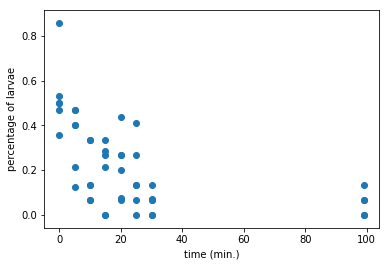

In [49]:
# Assign filename: file
file = fileloc+'seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])

# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter='\t', dtype=float, skiprows=1)

# Print the 10th element of data_float
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()

## Working with mixed datatypes
Much of the time you will need to import datasets which have different datatypes in different columns; one column may contain strings and another floats, for example. The function `np.loadtxt()` will freak at this. There is another function, `np.genfromtxt()`, which can handle such structures. If we pass `dtype=None` to it, it will figure out what types each column should be.

Import `'titanic.csv'` using the function `np.genfromtxt()` as follows:

```python
data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)
```

Here, the first argument is the filename, the second specifies the delimiter `,` and the third argument `names` tells us there is a header. Because the `data` are of different types, data is an object called a [structured array][1]. Because numpy arrays have to contain elements that are all the same type, the structured array solves this by being a 1D array, where each element of the array is a row of the flat file imported. You can test this by checking out the array's shape in the shell by executing `np.shape(data)`.

Accessing rows and columns of structured arrays is super-intuitive: to get the ith row, merely execute `data[i]` and to get the column with name `'Fare'`, execute `data['Fare']`.

Print the first for value of the column with name `Ticket` to the shell. 

[1]:http://docs.scipy.org/doc/numpy/user/basics.rec.html

In [64]:
data = np.genfromtxt(fileloc+'titanic.csv', delimiter=',', names=True, dtype=None, encoding=None)
data[0:4]

array([(1, 0, 3, 'male', 22., 1, 0, 'A/5 21171',  7.25  , '', 'S'),
       (2, 1, 1, 'female', 38., 1, 0, 'PC 17599', 71.2833, 'C85', 'C'),
       (3, 1, 3, 'female', 26., 0, 0, 'STON/O2. 3101282',  7.925 , '', 'S'),
       (4, 1, 1, 'female', 35., 1, 0, '113803', 53.1   , 'C123', 'S')],
      dtype=[('PassengerId', '<i4'), ('Survived', '<i4'), ('Pclass', '<i4'), ('Sex', '<U6'), ('Age', '<f8'), ('SibSp', '<i4'), ('Parch', '<i4'), ('Ticket', '<U18'), ('Fare', '<f8'), ('Cabin', '<U15'), ('Embarked', '<U1')])

In [67]:
data['Ticket'][0:4]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803'],
      dtype='<U18')

You have just used `np.genfromtxt()` to import data containing mixed datatypes. There is also another function `np.recfromcsv()` that behaves similarly to `np.genfromtxt()`, except that its default `dtype` is `None`. In this exercise, you'll practice using this to achieve the same result.

Import `titanic.csv` using the function `np.recfromcsv()`. You'll only need to pass `file` to it because it has the defaults `delimiter=','` and `names=True` in addition to `dtype=None`!

In [71]:
data = np.recfromcsv(fileloc+'titanic.csv', encoding=None)
data[:4]

rec.array([(1, 0, 3, 'male', 22., 1, 0, 'A/5 21171',  7.25  , '', 'S'),
           (2, 1, 1, 'female', 38., 1, 0, 'PC 17599', 71.2833, 'C85', 'C'),
           (3, 1, 3, 'female', 26., 0, 0, 'STON/O2. 3101282',  7.925 , '', 'S'),
           (4, 1, 1, 'female', 35., 1, 0, '113803', 53.1   , 'C123', 'S')],
          dtype=[('passengerid', '<i4'), ('survived', '<i4'), ('pclass', '<i4'), ('sex', '<U6'), ('age', '<f8'), ('sibsp', '<i4'), ('parch', '<i4'), ('ticket', '<U18'), ('fare', '<f8'), ('cabin', '<U15'), ('embarked', '<U1')])

## Using pandas to import flat files as DataFrames
In the last exercise, you were able to import flat files containing columns with different datatypes as `numpy` arrays. However, the DataFrame object in `pandas` is a more appropriate structure in which to store such data and, thankfully, we can easily import files of mixed data types as DataFrames using the pandas functions `read_csv()` and `read_table()`.

In [73]:
# Import pandas as pd
import pandas as pd

# Assign the filename: file
file = fileloc+'titanic.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)

# View the head of the DataFrame
df.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

In the last exercise, you were able to import flat files into a `pandas` DataFrame. As a bonus, it is then straightforward to retrieve the corresponding `numpy` array using the attribute `values`. You'll now have a chance to do this using the MNIST dataset, which is available as `digits.csv`.

In [75]:
# Assign the filename. 
file = fileloc+'digits.csv'

# Read the first 5 rows of the file into a DataFrame. (there is no header in this file)  
data = pd.read_csv(file,nrows=5,header=None)

# Build a numpy array from the DataFrame: data_array
data_array = data.values

# Print the datatype of data_array to the shell
type(data_array)

numpy.ndarray

## Customizing your pandas import
The `pandas` package is also great at dealing with many of the issues you will encounter when importing data as a data scientist, such as comments occurring in flat files, empty lines and missing values. Note that missing values are also commonly referred to as `NA` or `NaN`. To wrap up this chapter, you're now going to import a slightly corrupted copy of the Titanic dataset `titanic_corrupt.txt`, which

* contains comments after the character '#'
* is tab-delimited.

Argument `sep` is the `pandas` version of `delimiter` in `numpy`.

In [83]:
# Assign filename: file
file = fileloc+'titanic_corrupt.txt'

# Read the corrupted file
data = pd.read_csv(file)
data.head(2)

PassengerId\t"Survived"\t"Pclass"\t"Sex"\t"Age"\t"SibSp"\t"Parch"\t"Ticket"\t"Fare"\t"Cabin"\t"Embarked"
0  1\t"0"\t"3"\t"male"\t"22"\t"1"\t"0"\t"A/5 2117...                                                      
1  2\t"1"\t"1"\t"female"\t"38"\t"1"\t"0"\t"PC 175...

In [84]:
# is tab-delimited so apply the argument sep
data = pd.read_csv(file, sep='\t')
data.head(2)

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch       Ticket  \
0            1         0       3    male  22.0      1      0    A/5 21171   
1            2         1       1  female  38.0      1      0  PC 17599#to   

      Fare    Cabin    Embarked  
0   7.2500  Nothing  S #dfafdad  
1  71.2833      C85           C

In [142]:
# contains comments after the character '#' so apply the argument comment to takes characters that comments occur after in the file, which in this case is '#'
data = pd.read_csv(file, sep='\t', comment='#')
data.head(2)

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Ticket  Fare  \
0            1         0       3    male  22.0      1      0  A/5 21171  7.25   
1            2         1       1  female  38.0      1      0   PC 17599   NaN   

     Cabin Embarked  
0  Nothing       S   
1      NaN      NaN

In [144]:
# replaces ocurrences of 'Nothing' to NA/NaN
data = pd.read_csv(file, sep='\t', comment='#', na_values='Nothing')
data.head(2)

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Ticket  Fare  \
0            1         0       3    male  22.0      1      0  A/5 21171  7.25   
1            2         1       1  female  38.0      1      0   PC 17599   NaN   

  Cabin Embarked  
0   NaN       S   
1   NaN      NaN

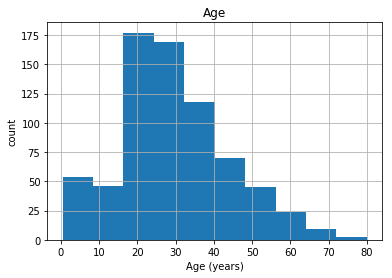

In [145]:
# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()